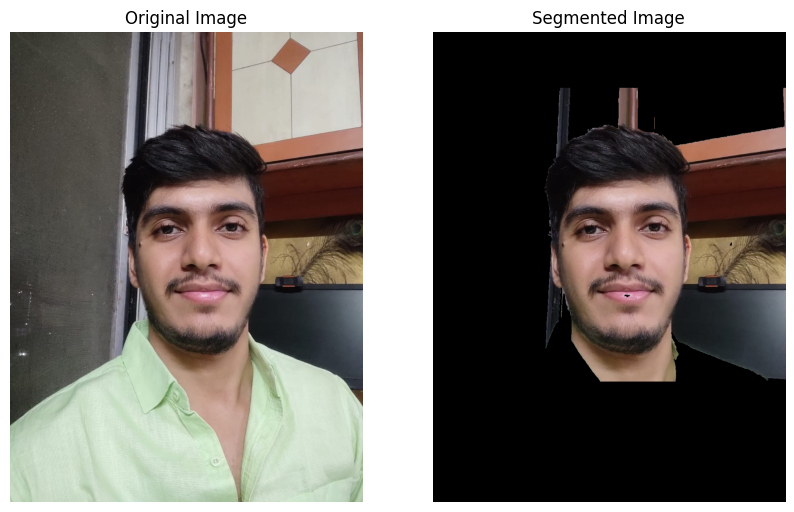

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an image
path = 'image.jpg'
image = cv2.imread(path)

# Create a mask where the foreground object is roughly marked
mask = np.zeros(image.shape[:2], np.uint8)

# Define a rectangle around the object to initialize the segmentation
rect = (199, 152, 866, 800)  # Format: (x, y, width, height)

# Initialize the background and foreground models
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Apply GrabCut algorithm
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Create a mask where the sure foreground and possible foreground are marked
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Multiply the original image with the mask to get the segmented result
result = image * mask2[:, :, np.newaxis]

# Display the original and segmented images using Matplotlib
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image')
plt.axis('off')

plt.show()